기존에 제출했을 당시, 시간관계상 train data의 일부분을 사용하여 모델을 학습시켰습니다.  
이에, train data전체를 학습시켜 정확도를 끌어올린 결과를 제출합니다.

# ***Sentiment140 데이터 셋 감정분류 ***

In [ ]:
# 필요한 라이브러리
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import numpy as np
import matplotlib.pyplot as plt

## **1. 데이터 불러오기**

In [86]:
(txt_train, label_train), (txt_test, label_test) = tfds.as_numpy(tfds.load(
    'sentiment140',
    split=['train[:80%]', 'train[80%:]'],
    batch_size=-1,
    as_supervised=True,
))

### **데이터 크기**

In [87]:
print(len(txt_train))
print(len(txt_test))

1280000
320000


## **2. 데이터 전처리**

In [88]:
from collections import Counter
cnt = Counter(label_train)
print('배열 내 각 원소를 세는 카운터 :', cnt)

배열 내 각 원소를 세는 카운터 : Counter({4: 640294, 0: 639706})


target변수가 0 또는 4로 분포  
=> 0 또는 1로 분포하도록 바꿔줌

In [89]:
label_train[label_train==4]=1

In [90]:
from collections import Counter
cnt = Counter(label_train)
print('배열 내 각 원소를 세는 카운터 :', cnt)

배열 내 각 원소를 세는 카운터 : Counter({1: 640294, 0: 639706})


### **영어 문장 정제**


In [ ]:
import re
import re


def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string.decode('utf-8')) #영문자, 숫자 외의 문자를 제거하고 'utf-8'형식으로 디코드
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

In [91]:
txt_train = [clean_str(sentence) for sentence in txt_train]

In [92]:
txt_train[:5]

['im 10x cooler than all of you ! ',
 'o kk \\? thats weird i cant stop following people on twitter i have tons of people to unfollow ',
 'what a beautiful day not to got to my first class ',
 ' hildygottlieb amp i was just saying to mahaal yesterday , everything we ever needed to know was in beatles lyrics you prove my point ! ',
 'kinda sad and confused why do guys do this \\? ']

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [93]:
txt_train = [TreebankWordTokenizer().tokenize(sentence) for sentence in txt_train]

In [94]:
txt_train[:5]

[['im', '10x', 'cooler', 'than', 'all', 'of', 'you', '!'],
 ['o',
  'kk',
  '\\',
  '?',
  'thats',
  'weird',
  'i',
  'cant',
  'stop',
  'following',
  'people',
  'on',
  'twitter',
  'i',
  'have',
  'tons',
  'of',
  'people',
  'to',
  'unfollow'],
 ['what',
  'a',
  'beautiful',
  'day',
  'not',
  'to',
  'got',
  'to',
  'my',
  'first',
  'class'],
 ['hildygottlieb',
  'amp',
  'i',
  'was',
  'just',
  'saying',
  'to',
  'mahaal',
  'yesterday',
  ',',
  'everything',
  'we',
  'ever',
  'needed',
  'to',
  'know',
  'was',
  'in',
  'beatles',
  'lyrics',
  'you',
  'prove',
  'my',
  'point',
  '!'],
 ['kinda',
  'sad',
  'and',
  'confused',
  'why',
  'do',
  'guys',
  'do',
  'this',
  '\\',
  '?']]

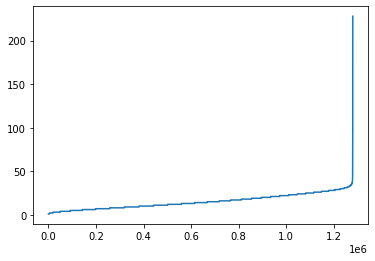

1278856


In [95]:
# 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in txt_train]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=40) for l in sentence_len]))

1280000개 중 1278856개의 문장의 단어 개수가 40개 이하임.  
따라서 기준이 되는 문장의 길이를 40 단어로 잡고 이 이상은 생략, 이 이하는 패딩으로 길이를 40으로 맞춰줌

In [97]:
sentences_new = []
for sentence in txt_train:
    sentences_new.append([word for word in sentence][:40])
txt_train = sentences_new
for i in range(5):
    print(txt_train[i])

['im', '10x', 'cooler', 'than', 'all', 'of', 'you', '!']
['o', 'kk', '\\', '?', 'thats', 'weird', 'i', 'cant', 'stop', 'following', 'people', 'on', 'twitter', 'i', 'have', 'tons', 'of', 'people', 'to', 'unfollow']
['what', 'a', 'beautiful', 'day', 'not', 'to', 'got', 'to', 'my', 'first', 'class']
['hildygottlieb', 'amp', 'i', 'was', 'just', 'saying', 'to', 'mahaal', 'yesterday', ',', 'everything', 'we', 'ever', 'needed', 'to', 'know', 'was', 'in', 'beatles', 'lyrics', 'you', 'prove', 'my', 'point', '!']
['kinda', 'sad', 'and', 'confused', 'why', 'do', 'guys', 'do', 'this', '\\', '?']


In [98]:
#Tokenizer와 pad_sequences를 사용한 문장 전처리(패딩작업)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=30000) #상위 29999개 단어만 사용
tokenizer.fit_on_texts(txt_train)
train_X = tokenizer.texts_to_sequences(txt_train)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   18 12159  3272   215    38    17    11     1     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  308  4687     7    13   306   668     2   175   354   438   156    20
    112     2    23  1977    17   156     3  3449     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [   55     6   341    37    31     3    47     3     8   182   445     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [   69     2    32    26   737     3   311     5   386    54   238   931
      3    64    32    14  4159  2671    11  5028     8   811     1     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  

In [99]:
print(tokenizer.index_word[30000]) #빈도 30000번째 단어 확인
# 30000위 단어는 인덱스로 반환되지 않음

kkk


## **3. 모델 정의**

In [100]:
#감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(30000, 100, input_length=40),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 40, 100)           3000000   
                                                                 
 lstm_12 (LSTM)              (None, 30)                15720     
                                                                 
 dense_12 (Dense)            (None, 2)                 62        
                                                                 
Total params: 3,015,782
Trainable params: 3,015,782
Non-trainable params: 0
_________________________________________________________________


### **모델 학습**

In [101]:
hitory=model.fit(train_X, label_train, epochs=5, batch_size=512, validation_split=0.2)

Epoch 1/5
2000/2000 [==============================] - 386s 192ms/step - loss: 0.4358 - accuracy: 0.7934 - val_loss: 0.3979 - val_accuracy: 0.8185
Epoch 2/5
2000/2000 [==============================] - 377s 189ms/step - loss: 0.3782 - accuracy: 0.8300 - val_loss: 0.3895 - val_accuracy: 0.8244
Epoch 3/5
2000/2000 [==============================] - 382s 191ms/step - loss: 0.3556 - accuracy: 0.8415 - val_loss: 0.3898 - val_accuracy: 0.8252
Epoch 4/5
2000/2000 [==============================] - 378s 189ms/step - loss: 0.3337 - accuracy: 0.8528 - val_loss: 0.3953 - val_accuracy: 0.8236
Epoch 5/5
2000/2000 [==============================] - 375s 188ms/step - loss: 0.3104 - accuracy: 0.8641 - val_loss: 0.4243 - val_accuracy: 0.8231


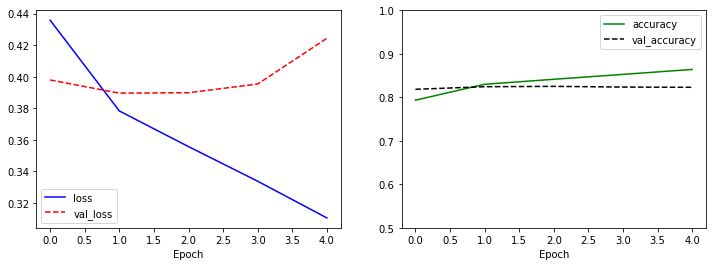

In [102]:
# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hitory.history['loss'], 'b-', label='loss')
plt.plot(hitory.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hitory.history['accuracy'], 'g-', label='accuracy')
plt.plot(hitory.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1.0)
plt.legend()

plt.show()

In [103]:
# 7.30 테스트 데이터 평가
txt_test = [clean_str(sentence) for sentence in txt_test]
txt_test = [TreebankWordTokenizer().tokenize(sentence) for sentence in txt_test]
sentences_new = []
for sentence in txt_test:
    sentences_new.append([word for word in sentence][:40])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')
label_test[label_test==4]=1
model.evaluate(test_X, label_test, verbose=0)

[0.42157235741615295, 0.823324978351593]